## Gradient Descent

$$
y = 3.5x + 2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 150
X = 2 * np.random.rand(n, 1) 
true_w = -2.1
true_b = 1.3
y = true_w * X + true_b + np.random.randn(n, 1)

n_val = 40
X_val = 2 * np.random.rand(n_val, 1)
y_val = true_w * X_val + true_b + np.random.randn(n_val, 1)

n_test = 40
X_test = 2 * np.random.rand(n_test, 1)
y_test = true_w * X_test + true_b + np.random.randn(n_test, 1)

# Hyperparameters
learning_rate = 0.1
epochs = 1000

def one_step(X: np.ndarray, y: np.ndarray, w: float, b: float, learning_rate: float) -> tuple:
    """One epoch of gradient descent"""
    m = len(X)
    y_pred = w * X + b

    residual = y - y_pred
    dw = -(1 / m) * np.sum(np.sign(residual) * X)
    db = -(1 / m) * np.sum(np.sign(residual))

    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b 

def gradient_descent(X: np.ndarray, y: np.ndarray, X_val: np.ndarray, y_val: np.ndarray, learning_rate: float, 
                     epochs: int, initial_w: float = None, initial_b: float = None, prints: int = 100) -> tuple:
    """Gradient Descent algorithm for linear regression with MAE loss"""

    w = np.random.randn() if initial_w is None else initial_w
    b = np.random.randn() if initial_b is None else initial_b

    print(f"Starting guess: w = {w:.4f}, b = {b:.4f}")

    losses = []
    val_losses = []

    for epoch in range(epochs):
        w, b = one_step(X, y, w, b, learning_rate) 

        loss = np.mean(np.abs(y - (w * X + b)))
        val_loss = np.mean(np.abs(y_val - (w * X_val + b)))
        losses.append(loss)
        val_losses.append(val_loss)
        
        if epoch % prints == 0: 
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
            print(f"Validation Loss = {val_loss:.4f}")
        
    return w, b, losses, val_losses

In [2]:
print("Experiment with a bad guess:")
w_bad, b_bad, losses_bad, val_losses_bad = gradient_descent(
    X, y, X_val, y_val, learning_rate, epochs, initial_w=5.0, initial_b=-5.0, prints=100
)

Experiment with a bad guess:
Starting guess: w = 5.0000, b = -5.0000
Epoch 0: Loss = 3.6787, w = 4.9531, b = -4.9960
Validation Loss = 3.6254
Epoch 100: Loss = 2.2267, w = 1.7607, b = -3.1520
Validation Loss = 2.2023
Epoch 200: Loss = 1.2354, w = -0.2485, b = -0.7387
Validation Loss = 1.1380
Epoch 300: Loss = 0.8734, w = -1.4577, b = 0.6000
Validation Loss = 0.6669
Epoch 400: Loss = 0.8293, w = -1.8353, b = 1.1227
Validation Loss = 0.6208
Epoch 500: Loss = 0.8174, w = -2.0430, b = 1.3733
Validation Loss = 0.6199
Epoch 600: Loss = 0.8159, w = -2.1114, b = 1.4560
Validation Loss = 0.6196
Epoch 700: Loss = 0.8156, w = -2.1569, b = 1.4693
Validation Loss = 0.6256
Epoch 800: Loss = 0.8156, w = -2.1663, b = 1.4920
Validation Loss = 0.6244
Epoch 900: Loss = 0.8156, w = -2.1686, b = 1.4907
Validation Loss = 0.6251


In [3]:
print("Experiment with a good guess:")
w_good, b_good, losses_good, val_losses_good = gradient_descent(
    X, y, X_val, y_val, learning_rate, epochs, initial_w=-2.0, initial_b=1.5, prints=100
)

Experiment with a good guess:
Starting guess: w = -2.0000, b = 1.5000
Epoch 0: Loss = 0.8210, w = -2.0146, b = 1.4840
Validation Loss = 0.6138
Epoch 100: Loss = 0.8157, w = -2.1349, b = 1.4587
Validation Loss = 0.6219
Epoch 200: Loss = 0.8156, w = -2.1609, b = 1.4800
Validation Loss = 0.6249
Epoch 300: Loss = 0.8156, w = -2.1666, b = 1.4920
Validation Loss = 0.6245
Epoch 400: Loss = 0.8156, w = -2.1664, b = 1.4920
Validation Loss = 0.6244
Epoch 500: Loss = 0.8156, w = -2.1662, b = 1.4920
Validation Loss = 0.6244
Epoch 600: Loss = 0.8156, w = -2.1684, b = 1.4907
Validation Loss = 0.6251
Epoch 700: Loss = 0.8155, w = -2.1682, b = 1.4907
Validation Loss = 0.6251
Epoch 800: Loss = 0.8155, w = -2.1680, b = 1.4907
Validation Loss = 0.6250
Epoch 900: Loss = 0.8155, w = -2.1678, b = 1.4907
Validation Loss = 0.6249


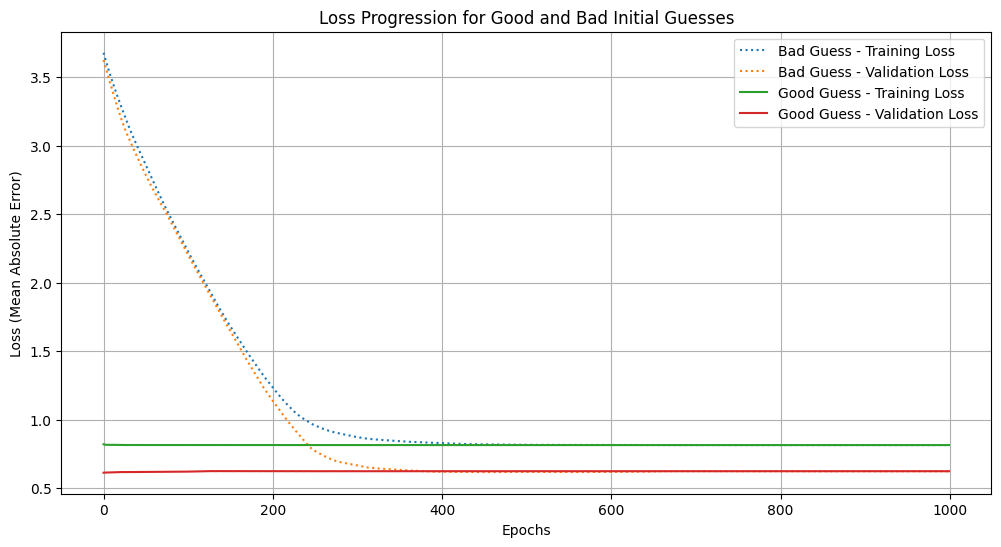

In [4]:


# Plot the losses for bad and good guesses
plt.figure(figsize=(12, 6))

# Loss progression for the bad guess
plt.plot(range(epochs), losses_bad, label='Bad Guess - Training Loss', linestyle='dotted')
plt.plot(range(epochs), val_losses_bad, label='Bad Guess - Validation Loss', linestyle='dotted')

# Loss progression for the good guess
plt.plot(range(epochs), losses_good, label='Good Guess - Training Loss', linestyle='solid')
plt.plot(range(epochs), val_losses_good, label='Good Guess - Validation Loss', linestyle='solid')

# Labels and legend
plt.title("Loss Progression for Good and Bad Initial Guesses")
plt.xlabel("Epochs")
plt.ylabel("Loss (Mean Absolute Error)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()